## Trading Strategy Performance Matrices using ffn (Financial functions for Python)


Overview:
ffn is a library that contains many useful functions for performance measurement and evaluation of backtesting of Qunatitative Trading Strategies

Install:
pip install ffn

Documentation:
Read the docs at http://pmorissette.github.io/ffn

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import ffn
%matplotlib inline

C:\Users\Umesh\anaconda3\lib\site-packages\ffn\core.py:27: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


In [2]:
#creating a dataframe
num_days = 1000
data = (np.random.randn(num_days) + np.random.uniform(low=0.0, high=0.2, size=num_days))
index = pd.date_range('01/01/2010',periods=num_days, freq='D')
data = pd.DataFrame(data,index=index,columns=['Returns'])

In [3]:
#creating a trading account name 'Equity' with a starting capital of 100
data['Equity'] = data.cumsum()+ 100
data.iloc[0] = 100

In [4]:
data

,Returns,Equity
2010-01-01,100.000000,100.000000
2010-01-02,1.312363,101.666148
2010-01-03,-0.725760,100.940388
2010-01-04,1.040064,101.980452
2010-01-05,-0.255529,101.724923
...,...,...
2012-09-22,-0.780612,186.904266
2012-09-23,0.530192,187.434458
2012-09-24,0.170445,187.604903
2012-09-25,0.253076,187.857979


In [5]:
#class ffn.core.PerformanceStats(prices, rf=0.0)
perm= ffn.core.PerformanceStats(data['Equity'], rf=0.5)

C:\Users\Umesh\anaconda3\lib\site-packages\ffn\core.py:2056: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


In [6]:
perm

In [7]:
#Displays an overview containing descriptive stats for the Series provided.
perm.display()

Stats for Equity from 2010-01-01 00:00:00 - 2012-09-26 00:00:00
Annual risk-free rate considered: 50.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
87.39%             -2.06  25.81%  -7.51%

Annualized Returns:
mtd    3m     6m      ytd     1y      3y      5y    10y    incep.
-----  -----  ------  ------  ------  ------  ----  -----  --------
3.75%  9.68%  14.93%  23.50%  26.47%  25.81%  -     -      25.81%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  -2.06    -1.36      -7.23
mean    16.53%   24.81%     20.63%
vol     11.68%   12.11%     4.06%
skew    -0.02    -0.20      -
kurt    0.23     0.53       -
best    2.80%    10.59%     23.50%
worst   -2.63%   -6.23%     17.76%

Drawdowns:
max     avg       # days
------  ------  --------
-7.51%  -1.87%     13.03

Misc:
---------------  -------
avg. up month    3.74%
avg. down month  -2.20%
up year %        100.00%
12m up %         100.

In [8]:
#Displays an overview containing descriptive stats for the Series provided.
perm.stats

start                    2010-01-01 00:00:00
end                      2012-09-26 00:00:00
rf                                       0.5
total_return                          0.8739
cagr                                0.258115
max_drawdown                       -0.075088
calmar                                3.4375
mtd                                0.0375338
three_month                        0.0968383
six_month                           0.149291
ytd                                 0.235027
one_year                            0.264657
three_year                          0.258115
five_year                                NaN
ten_year                                 NaN
incep                               0.258115
daily_sharpe                        -2.05965
daily_sortino                       -3.69712
daily_mean                          0.165278
daily_vol                           0.116774
daily_skew                        -0.0155648
daily_kurt                          0.226734
best_day  

In [9]:
#Displays the current lookback returns.
perm.display_lookback_returns()

mtd       3.75%
3m        9.68%
6m       14.93%
ytd      23.50%
1y       26.47%
3y       25.81%
5y         nan%
10y        nan%
incep    25.81%
Name: Equity, dtype: object

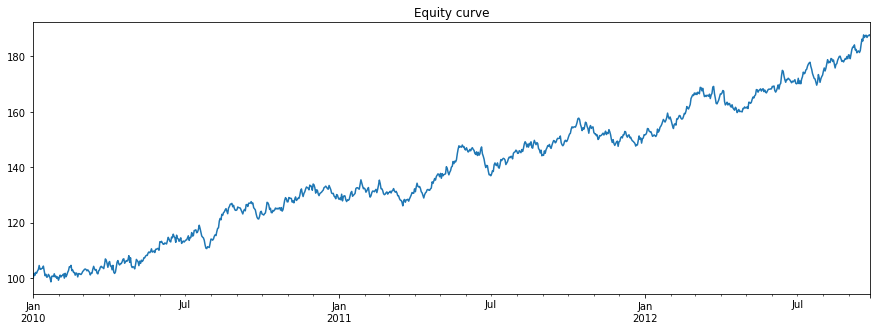

In [10]:
#plting equity curve
perm.plot(title='Equity curve')

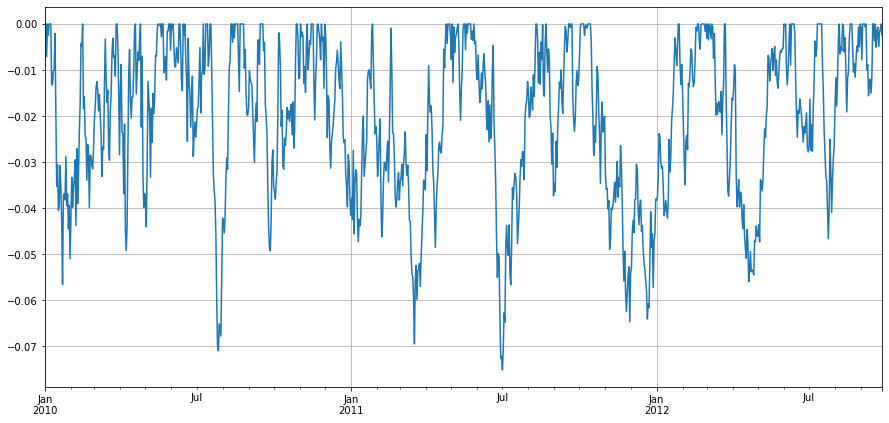

In [11]:
ffn.to_drawdown_series(data['Equity']).plot(figsize=(15,7),grid=True)

End!!